In [1]:
import numpy as np 
import scanpy as sc 
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import seaborn as sns 
import anndata as ad 
import scanpy.external as sce 

In [2]:

def pipe_1(scdata, sigma = 0.1, theta = 1.5, regular = True):
    if regular:
        sc.tl.pca(scdata)
        sc.pl.pca(scdata, color = ['species', 'celltype'])
        sc.pp.neighbors(scdata)
        sc.tl.umap(scdata)
        sc.pl.umap(scdata, color = ['species', 'celltype'])
    sce.pp.harmony_integrate(scdata, 'species', max_iter_harmony = 20, sigma = sigma, random_state = 0,theta = theta)#theta = 2)
    sc.pl.embedding(scdata, basis = 'X_pca_harmony', color = ['species','celltype'])
    sc.pp.neighbors(scdata, use_rep= 'X_pca_harmony')
    sc.tl.umap(scdata)
    sc.pl.umap(scdata, color = ['species','celltype'])

    eco_dic = {'CY': 'eco',
            'JT': 'eco',
            'QF': 'non-eco',
            'M': 'non-eco',
            'T': 'eco'}

    scdata.obs.loc[:,'eco'] = scdata.obs.species.map(eco_dic)
    sc.pl.umap(scdata, color = 'eco')
    return scdata 

def count_summary(neuron, key_1 , key_2 = 'samples'):
        anno_df = neuron.obs.copy()
        anno_df.head()

        df = anno_df 
        # 1. 按col1和col2分组，统计每个组合的数量
        grouped = df.groupby([key_1, key_2]).size().reset_index(name='count')

        # 2. 按col1分组，计算总数
        total_counts = df.groupby(key_2).size().reset_index(name='total_count')

        # 3. 合并数据，计算比例
        merged = grouped.merge(total_counts, on=key_2)
        merged['proportion'] = merged['count'] #/ merged['total_count']

        # 4. 重新排序和格式化结果
        result = merged[[key_2, key_1, 'proportion']]

        result = result.pivot(index=key_1, columns=key_2, values='proportion')
        return result 

print('utils code')

utils code


## only neuron

In [3]:
save_dir = 'data'
scdata = sc.read_h5ad(os.path.join(save_dir, 'hmdata_raw_1.h5ad'))
scdata.raw = scdata 

neuron = scdata[scdata.obs.cluster == 'neuron']
sc.pp.highly_variable_genes(neuron, n_top_genes=3000)
neuron= neuron[:,neuron.var.highly_variable]

d:\Anaconda\envs\scanpy-1.10\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:664: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}


d:\Anaconda\envs\scanpy-1.10\lib\site-packages\scanpy\preprocessing\_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


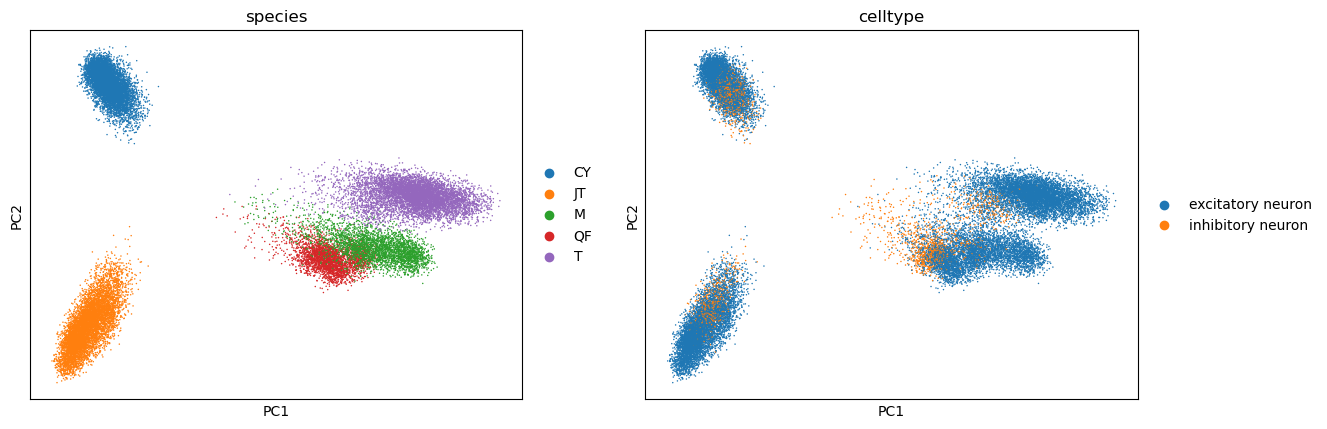

d:\Anaconda\envs\scanpy-1.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


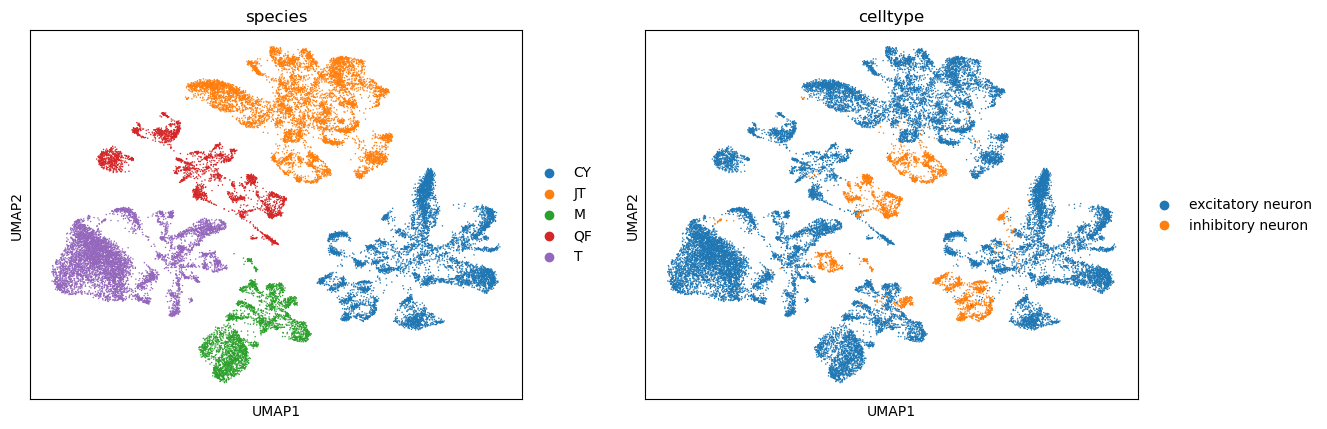

2024-12-17 13:40:37,660 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-12-17 13:40:41,112 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-12-17 13:40:41,304 - harmonypy - INFO - Iteration 1 of 20
2024-12-17 13:40:51,848 - harmonypy - INFO - Iteration 2 of 20
2024-12-17 13:41:01,249 - harmonypy - INFO - Iteration 3 of 20
2024-12-17 13:41:10,457 - harmonypy - INFO - Iteration 4 of 20
2024-12-17 13:41:19,727 - harmonypy - INFO - Iteration 5 of 20
2024-12-17 13:41:28,931 - harmonypy - INFO - Iteration 6 of 20
2024-12-17 13:41:38,148 - harmonypy - INFO - Iteration 7 of 20
2024-12-17 13:41:45,618 - harmonypy - INFO - Iteration 8 of 20
2024-12-17 13:41:50,888 - harmonypy - INFO - Converged after 8 iterations


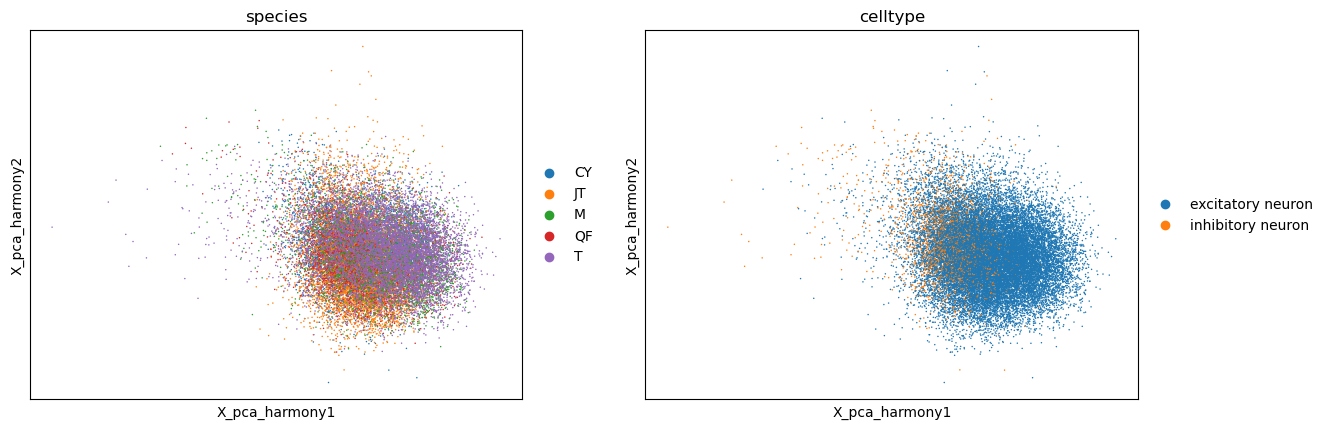

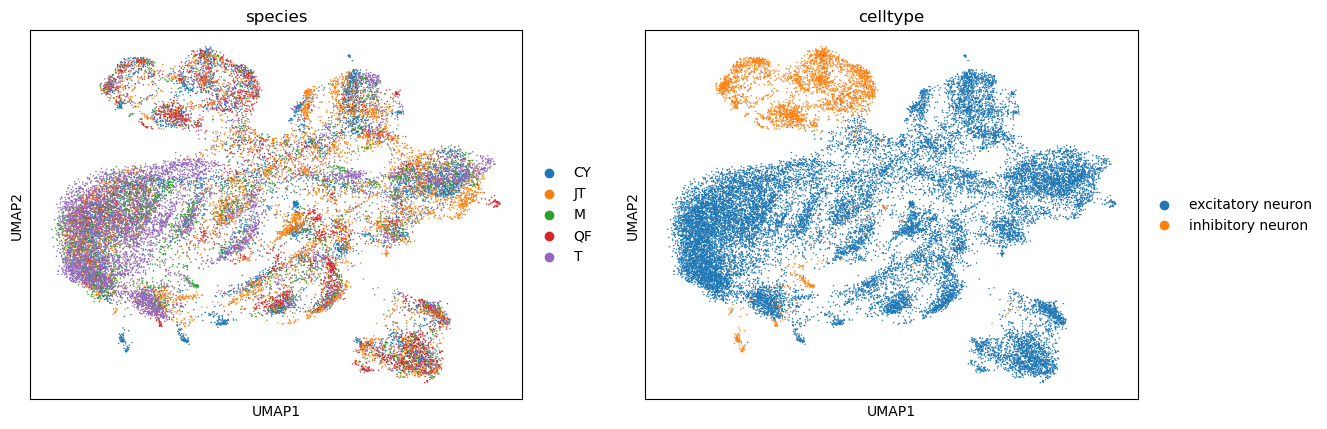

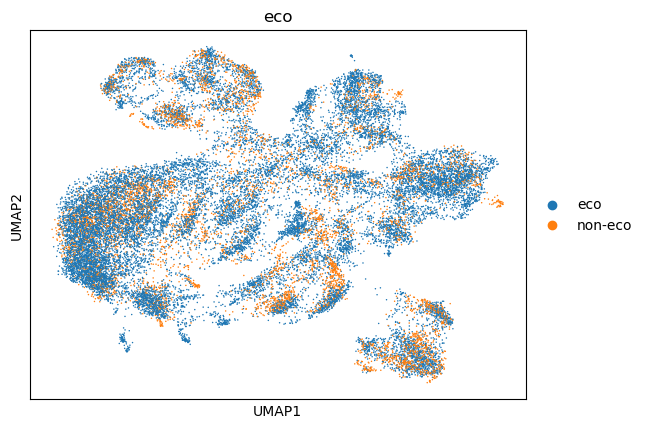

C:\Users\sunrui\AppData\Local\Temp\ipykernel_21536\657247488.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(neuron, resolution= 0.4)


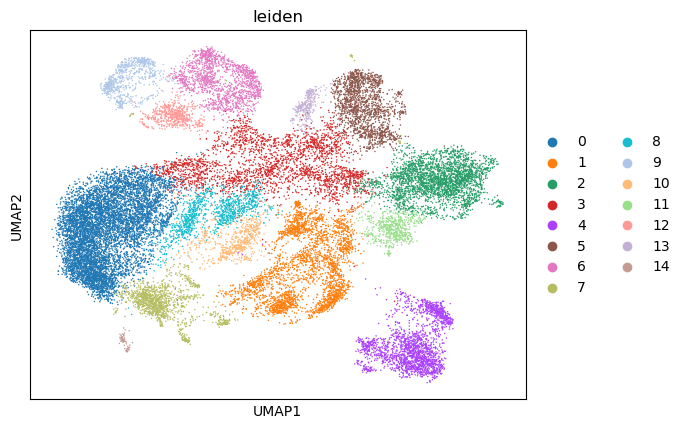

samples  CYHM  JTHM   MHM  QFHM   THM
leiden                               
0        1265  1245  1106   435  3336
1         855  1058   273   603   257
2         905   909   339   100   564
3         590   852   292   168   714
4         641   625   175   559   135
5         593   599   134   126   220
6         508   369    63   393   141
7         217   296   199    90   519
8         178   270   302    34   384
9         284   204    55   110    77
10        114   114    77    74   275
11        234   239    47    37    59
12        157   120    30   206    48
13        107   159     5    10    14
14         75     0     0     0     0


C:\Users\sunrui\AppData\Local\Temp\ipykernel_21536\409565296.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby([key_1, key_2]).size().reset_index(name='count')
C:\Users\sunrui\AppData\Local\Temp\ipykernel_21536\409565296.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df.groupby(key_2).size().reset_index(name='total_count')


In [4]:
neuron = pipe_1(neuron, 0.1, 2.5,True)
sc.tl.leiden(neuron, resolution= 0.4)
sc.pl.umap(neuron, color = 'leiden')
print(count_summary(neuron, 'leiden' , key_2 = 'samples'))

2024-12-17 13:47:04,671 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-12-17 13:47:07,677 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-12-17 13:47:07,850 - harmonypy - INFO - Iteration 1 of 20
2024-12-17 13:47:17,636 - harmonypy - INFO - Iteration 2 of 20
2024-12-17 13:47:27,317 - harmonypy - INFO - Iteration 3 of 20
2024-12-17 13:47:37,085 - harmonypy - INFO - Iteration 4 of 20
2024-12-17 13:47:46,795 - harmonypy - INFO - Iteration 5 of 20
2024-12-17 13:47:56,344 - harmonypy - INFO - Iteration 6 of 20
2024-12-17 13:48:04,959 - harmonypy - INFO - Iteration 7 of 20
2024-12-17 13:48:11,630 - harmonypy - INFO - Iteration 8 of 20
2024-12-17 13:48:19,973 - harmonypy - INFO - Converged after 8 iterations


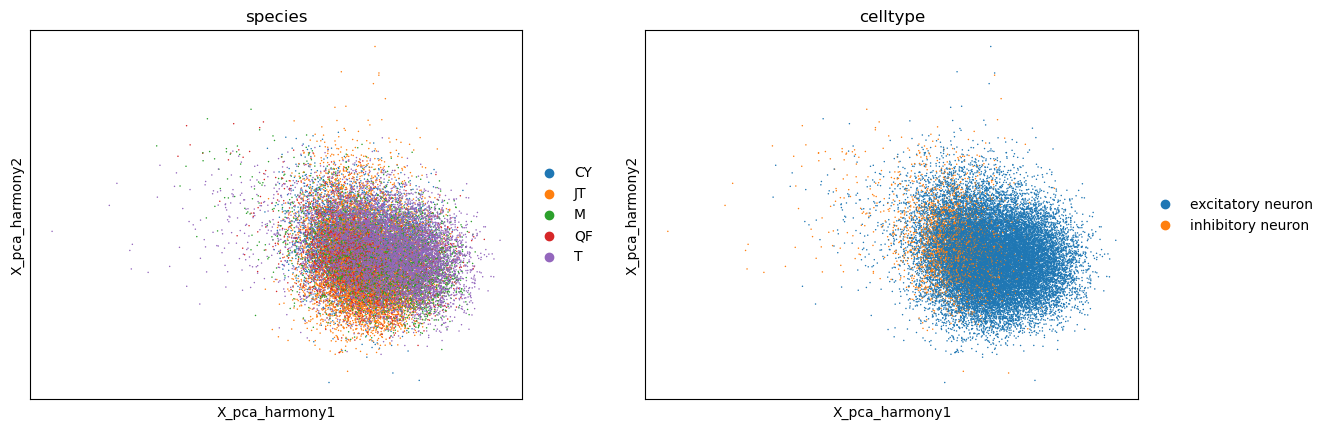

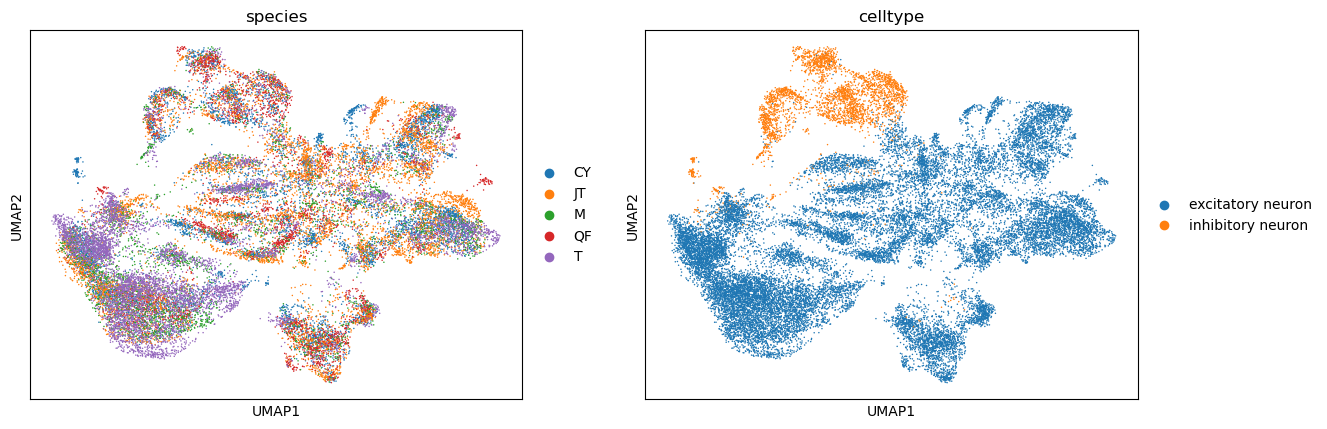

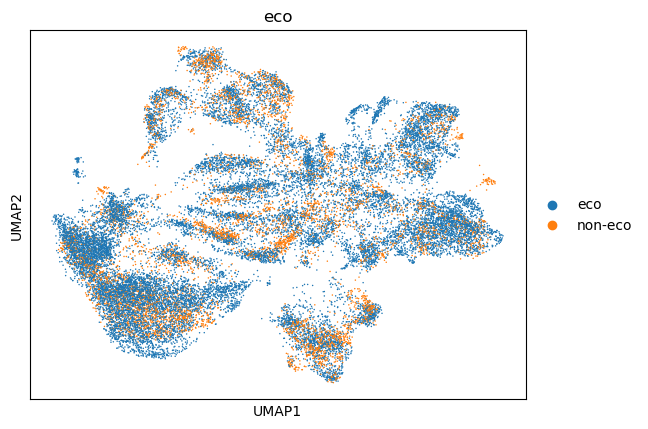

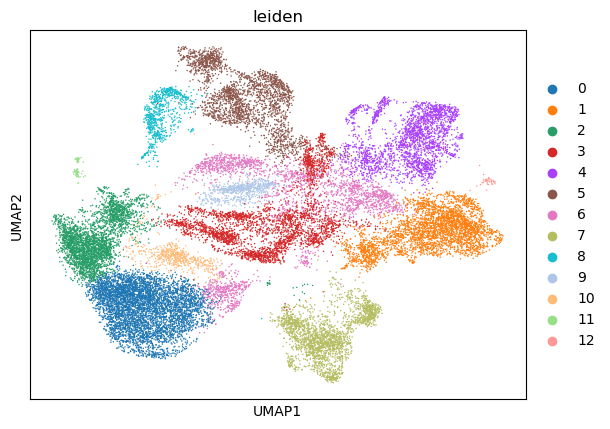

samples  CYHM  JTHM  MHM  QFHM   THM
leiden                              
0         762   848  835   408  2216
1        1112  1120  367   101   615
2         562   655  404   112  1547
3         961  1066  273   601   243
4         847   985  168   149   298
5         747   673  143   650   231
6         521   723  312   118   748
7         712   649  180   560   202
8         286   202   98   110   104
9         109   114   75    73   275
10         35    24  242    22   264
11         69     0    0     0     0
12          0     0    0    41     0


C:\Users\sunrui\AppData\Local\Temp\ipykernel_21536\409565296.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby([key_1, key_2]).size().reset_index(name='count')
C:\Users\sunrui\AppData\Local\Temp\ipykernel_21536\409565296.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df.groupby(key_2).size().reset_index(name='total_count')


In [5]:
neuron = pipe_1(neuron, 0.1, 2.9,False)
sc.tl.leiden(neuron, resolution= 0.4)
sc.pl.umap(neuron, color = 'leiden')
print(count_summary(neuron, 'leiden' , key_2 = 'samples'))